# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Include dividends? (If yes, set to True)

In [4]:
use_adj = True

Define high low trade periods

In [5]:
sma_period = 200
percent_band = 3.5

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, use_adj, sma_period, percent_band)
s.run()

Retrieve log DataFrames

In [7]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
37,1998-11-04,1118.67,1999-10-15,1247.41,128.74,100159.71,778,960793.53,LONG,^GSPC
38,1999-10-29,1362.93,2000-10-10,1387.02,24.09,17152.06,712,977945.59,LONG,^GSPC
39,2003-04-22,911.37,2004-08-06,1063.97,152.60,165418.37,1084,1143363.96,LONG,^GSPC
40,2004-11-04,1161.67,2007-11-21,1416.77,255.10,253059.18,992,1396423.14,LONG,^GSPC
41,2009-06-12,946.21,2010-06-04,1064.88,118.67,176343.59,1486,1572766.73,LONG,^GSPC
42,2010-10-05,1160.75,2011-08-04,1200.07,39.32,53593.09,1363,1626359.82,LONG,^GSPC
43,2012-01-18,1308.04,2015-08-21,1970.89,662.85,829225.32,1251,2455585.14,LONG,^GSPC
44,2016-04-18,2094.34,2018-10-24,2656.10,561.76,661191.53,1177,3116776.67,LONG,^GSPC
45,2019-03-21,2854.88,2020-03-09,2746.56,-108.32,-118610.21,1095,2998166.46,LONG,^GSPC
46,2020-06-03,3122.87,2020-07-17,3224.73,101.86,98091.05,963,3096257.51,LONG,^GSPC


In [9]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-07-13,3116455.76,3033743.56,3039319.37,963,842.54,1.00,-
2020-07-14,3083357.34,3012779.03,3080054.32,963,842.54,1.00,-
2020-07-15,3119306.21,3083174.43,3108019.88,963,842.54,1.00,-
2020-07-16,3102078.01,3081084.79,3097436.51,963,842.54,1.00,-
2020-07-17,3106257.51,3106257.51,3106257.51,0,3106257.51,1.00,X


Generate strategy stats - display all available stats

In [10]:
pf.print_full(stats)

start                                                  1928-10-16
end                                                    2020-07-17
beginning_balance                                           10000
ending_balance                                         3106257.51
total_net_profit                                       3096257.51
gross_profit                                           3262282.89
gross_loss                                             -166025.38
profit_factor                                               19.65
return_on_initial_capital                                30962.58
annual_return_rate                                           6.45
trading_period                           91 years 9 months 1 days
pct_time_in_market                                          67.09
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end, s._use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1928-10-16 00:00:00 BUY  460 ^GSPC @ 21.72
2020-07-17 00:00:00 SELL 460 ^GSPC @ 3224.73


Plot Equity Curves: Strategy vs Benchmark

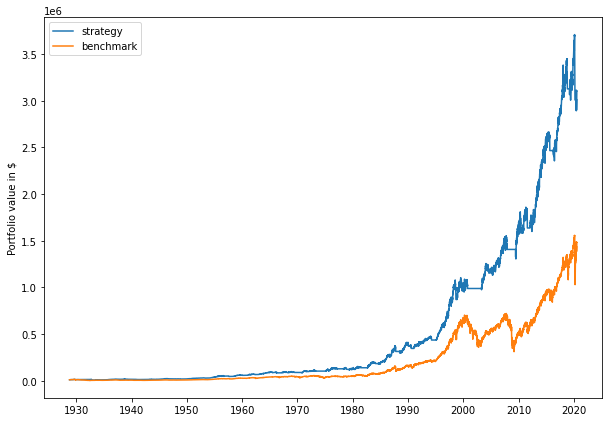

In [12]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

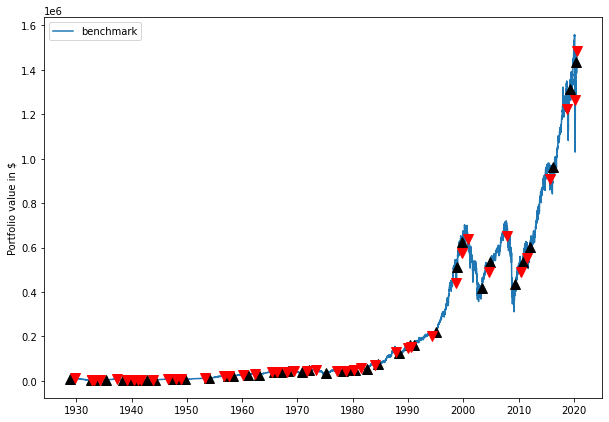

In [13]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

In [14]:
print('trading period:  {} to {}'.format(stats['start'], stats['end']))
df = pf.summary(stats, benchmark.stats, metrics=pf.currency_metrics)
df

trading period:  1928-10-16 to 2020-07-17


,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$3,106,257.51","$1,483,384.59"
total_net_profit,"$3,096,257.51","$1,473,384.59"
gross_profit,"$3,262,282.89","$1,473,384.59"
gross_loss,"-$166,025.38",$0.00


Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.45,5.60
max_closed_out_drawdown,-56.58,-86.14
drawdown_annualized_return,-8.77,-15.38
drawdown_recovery,-3.51,-2.71
best_month,27.01,61.27
worst_month,-29.72,-42.17
sharpe_ratio,0.57,0.38
sortino_ratio,0.58,0.48
monthly_std,3.43,5.35


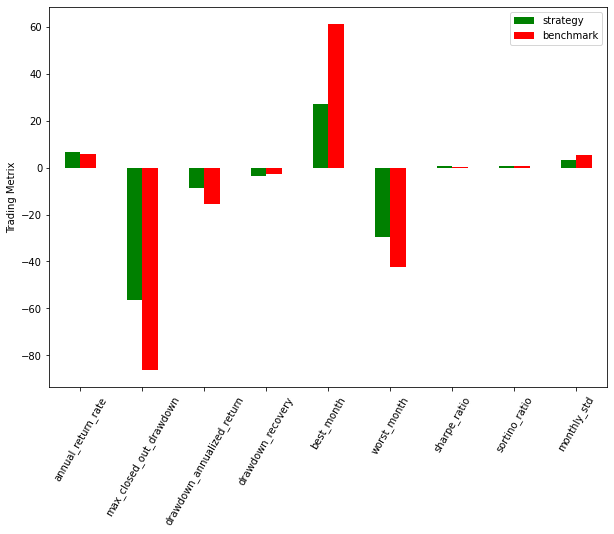

In [15]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

Print the raw transaction log

In [16]:
pd.set_option('display.max_rows', len(rlog))
rlog

,date,price,shares,entry_exit,direction,symbol
0,1928-10-16,21.72,460,entry,LONG,^GSPC
1,1929-10-24,25.75,460,exit,LONG,^GSPC
2,1932-08-10,7.65,1549,entry,LONG,^GSPC
3,1932-10-10,6.42,1549,exit,LONG,^GSPC
4,1932-10-19,7.40,1344,entry,LONG,^GSPC
5,1932-11-02,6.52,1344,exit,LONG,^GSPC
6,1932-11-07,7.24,1210,entry,LONG,^GSPC
7,1932-12-02,6.47,1210,exit,LONG,^GSPC
8,1932-12-09,7.08,1106,entry,LONG,^GSPC
9,1933-02-14,6.32,1106,exit,LONG,^GSPC
